In [1692]:
import pandas as pd
import numpy as np

In [1693]:
df = pd.read_csv('data.csv')

In [1694]:
df.head(3)

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...


In [1695]:
df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID'],
      dtype='object')

#DROPPING THE UNWANTED COLUMNS

In [1696]:
df.isna().sum()

Restaurant ID                                             0
Restaurant name                                           0
Subzone                                                   0
City                                                      0
Order ID                                                  0
Order Placed At                                           0
Order Status                                              0
Delivery                                                  0
Distance                                                  0
Items in order                                            0
Instructions                                          20601
Discount construct                                     5498
Bill subtotal                                             0
Packaging charges                                         0
Restaurant discount (Promo)                               0
Restaurant discount (Flat offs, Freebies & others)        0
Gold discount                           

In [1697]:
null_percent = df.isna().mean() * 100
print(null_percent)


Restaurant ID                                          0.000000
Restaurant name                                        0.000000
Subzone                                                0.000000
City                                                   0.000000
Order ID                                               0.000000
Order Placed At                                        0.000000
Order Status                                           0.000000
Delivery                                               0.000000
Distance                                               0.000000
Items in order                                         0.000000
Instructions                                          96.623048
Discount construct                                    25.786783
Bill subtotal                                          0.000000
Packaging charges                                      0.000000
Restaurant discount (Promo)                            0.000000
Restaurant discount (Flat offs, Freebies

In [1698]:
cols_to_drop = [
    "Instructions",
    "Rating",
    "Review",
    "Cancellation / Rejection reason",
    "Restaurant compensation (Cancellation)",
    "Restaurant penalty (Rejection)",
    "Customer complaint tag",
    "Customer ID"
]

df = df.drop(columns=cols_to_drop)


In [1699]:
df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked'],
      dtype='object')

In [1700]:
df.isna().sum()

Restaurant ID                                            0
Restaurant name                                          0
Subzone                                                  0
City                                                     0
Order ID                                                 0
Order Placed At                                          0
Order Status                                             0
Delivery                                                 0
Distance                                                 0
Items in order                                           0
Discount construct                                    5498
Bill subtotal                                            0
Packaging charges                                        0
Restaurant discount (Promo)                              0
Restaurant discount (Flat offs, Freebies & others)       0
Gold discount                                            0
Brand pack discount                                     

In [1701]:
df.dtypes

Restaurant ID                                           int64
Restaurant name                                        object
Subzone                                                object
City                                                   object
Order ID                                                int64
Order Placed At                                        object
Order Status                                           object
Delivery                                               object
Distance                                               object
Items in order                                         object
Discount construct                                     object
Bill subtotal                                         float64
Packaging charges                                     float64
Restaurant discount (Promo)                           float64
Restaurant discount (Flat offs, Freebies & others)    float64
Gold discount                                         float64
Brand pa

#HANDLING MISSING VALS

In [1702]:
df["Discount construct"] = df["Discount construct"].fillna("No discount")


In [1703]:
df["Rider wait time (minutes)"] = df["Rider wait time (minutes)"].fillna(
    df["Rider wait time (minutes)"].median()
)


In [1704]:
df = df.dropna(subset=["KPT duration (minutes)"])


In [1705]:
df.isna().sum()

Restaurant ID                                         0
Restaurant name                                       0
Subzone                                               0
City                                                  0
Order ID                                              0
Order Placed At                                       0
Order Status                                          0
Delivery                                              0
Distance                                              0
Items in order                                        0
Discount construct                                    0
Bill subtotal                                         0
Packaging charges                                     0
Restaurant discount (Promo)                           0
Restaurant discount (Flat offs, Freebies & others)    0
Gold discount                                         0
Brand pack discount                                   0
Total                                           

new thing

new thing

In [1706]:
df.dtypes

Restaurant ID                                           int64
Restaurant name                                        object
Subzone                                                object
City                                                   object
Order ID                                                int64
Order Placed At                                        object
Order Status                                           object
Delivery                                               object
Distance                                               object
Items in order                                         object
Discount construct                                     object
Bill subtotal                                         float64
Packaging charges                                     float64
Restaurant discount (Promo)                           float64
Restaurant discount (Flat offs, Freebies & others)    float64
Gold discount                                         float64
Brand pa

In [1707]:
df["Order Placed At"] = pd.to_datetime(
    df["Order Placed At"],
    format="%I:%M %p, %B %d %Y",
    errors="coerce"
)


In [1708]:
df = df.drop(columns=["Restaurant name"])


In [1709]:
df["Subzone"].unique()


array(['Sector 4', 'Greater Kailash 2 (GK2)', 'DLF Phase 1', 'Sector 135',
       'Vasant Kunj', 'Shahdara', 'Sikandarpur', 'Chittaranjan Park'],
      dtype=object)

In [1710]:
df = pd.get_dummies(df, columns=["Subzone"], prefix="Subzone")


In [1711]:
df["City"].unique()


array(['Delhi NCR'], dtype=object)

In [1712]:
df = df.drop(columns=["City"])


In [1713]:
df["Order Status"].value_counts()


Order Status
Delivered           20934
Rejected               61
Returned               25
Return cancelled        3
Picked up               3
Name: count, dtype: int64

In [1714]:
df["Delivery"].unique()


array(['Zomato Delivery'], dtype=object)

In [1715]:

df = df.drop(columns=["Delivery"])

In [1716]:
df["Distance"].unique()


array(['3km', '2km', '<1km', '1km', '6km', '4km', '5km', '8km', '7km',
       '10km', '9km', '11km', '16km', '14km', '15km', '17km', '12km',
       '18km', '13km', '19km', '21km', '20km'], dtype=object)

In [1717]:

# Create a new numeric column
df["Distance_km"] = df["Distance"].replace({"<1km": "0.5km"})
df["Distance_km"] = df["Distance_km"].str.replace("km", "", regex=False).astype(float)


DISH DF


In [1718]:
import re
import pandas as pd

def parse_items(s):
    parts = [p.strip() for p in s.split(",")]
    items = []
    for p in parts:
        m = re.match(r"(\d+)\s*x\s*(.*)", p)
        if m:
            qty = int(m.group(1))
            name = m.group(2).strip()   # dish name
            items.append((name, qty))
    return items

tmp = df[["Order ID", "Items in order", "KPT duration (minutes)"]].copy()
tmp["parsed"] = tmp["Items in order"].apply(parse_items)

dish_df = tmp.explode("parsed")
dish_df["dish_name"] = dish_df["parsed"].str[0]
dish_df["dish_qty"]  = dish_df["parsed"].str[1]
dish_df = dish_df.drop(columns=["parsed"])


In [1719]:
dish_stats = (
    dish_df.groupby("dish_name")["KPT duration (minutes)"]
           .agg(["mean", "count"])
           .rename(columns={"mean": "dish_mean_kpt", "count": "dish_count"})
           .reset_index()
)

overall_mean = df["KPT duration (minutes)"].mean()


In [1720]:
min_count = 20
extra_minutes = 3  # threshold above overall mean

complex_dishes = dish_stats[
    (dish_stats["dish_count"] >= min_count) &
    (dish_stats["dish_mean_kpt"] >= overall_mean + extra_minutes)
]["dish_name"].tolist()

print("Number of complex dishes:", len(complex_dishes))
print("Examples:", complex_dishes[:10])


Number of complex dishes: 21
Examples: ['AAC Grilled Chicken Burger', 'AAC Grilled Paneer Burger', 'AAC Special Slaw', 'Angara Aloo Tuk Tuki', 'Angara Boneless Grilled Chicken Breast', 'Angara Grilled Paneer (8 pcs)', 'Bacon Pepperoni Melt', 'Cafreal dip', 'Chicken 65 Boneless Grilled Chicken Breast', 'Grilled Chicken Angara Tangdi']


In [1721]:
dish_df["is_complex_dish"] = dish_df["dish_name"].isin(complex_dishes).astype(int)

# how many complex dishes in each order (counting quantity)
complex_per_order = (
    dish_df.assign(complex_qty = dish_df["dish_qty"] * dish_df["is_complex_dish"])
           .groupby("Order ID")["complex_qty"]
           .sum()
           .rename("num_complex_dishes")
           .reset_index()
)

# also a simple 0/1 flag: does this order contain *any* complex dish?
has_complex_per_order = (
    dish_df.groupby("Order ID")["is_complex_dish"]
           .max()
           .rename("has_complex_dish")
           .reset_index()
)

order_complex_features = complex_per_order.merge(
    has_complex_per_order, on="Order ID", how="left"
)


In [1722]:
df = df.merge(order_complex_features, on="Order ID", how="left")
df["num_complex_dishes"] = df["num_complex_dishes"].fillna(0)
df["has_complex_dish"]   = df["has_complex_dish"].fillna(0).astype(int)


In [1723]:
df["Items in order"].unique()


array(['1 x Grilled Chicken Jamaican Tender, 1 x Grilled Chicken Peri Peri Tangdi',
       '1 x Peri Peri Fries, 1 x Fried Chicken Angara Tender, 1 x Grilled Chicken Angara Tender',
       '1 x Bone in Peri Peri Grilled Chicken', ...,
       '1 x Fried Chicken Desi Peri Peri Bites (Bone)',
       '1 x Korean Fried Chicken Slider',
       '1 x Grilled Chicken Jamaican Slider'], shape=(6059,), dtype=object)

In [1724]:
import re

def count_items(s):
    # split by comma into individual "1 x ..." parts
    parts = [p.strip() for p in s.split(",")]
    total = 0
    for p in parts:
        # look for "number x" at the start, e.g. "1 x", "2 x"
        m = re.match(r"(\d+)\s*x", p)
        if m:
            total += int(m.group(1))
        else:
            # fallback: if pattern not found, count it as 1 item
            total += 1
    return total

df["num_items"] = df["Items in order"].apply(count_items)


In [1725]:
df["Discount construct"].value_counts().head(10)


Discount construct
No discount            5406
50% off upto Rs.100    3512
Flat 15% off           1469
Flat Rs.200 off        1106
60% off upto Rs.120    1095
Flat Rs.150 off         801
Flat Rs.175 off         745
Flat Rs.125 off         589
40% off upto Rs.80      559
Flat Rs.100 off         375
Name: count, dtype: int64

In [1726]:
df["Discount construct"].unique()


array(['40% off upto Rs.80', 'Flat Rs.175 off', '50% off upto Rs.100',
       'No discount', 'Flat Rs.80 off', '20% off upto Rs.50',
       'Flat Rs.150 off', 'Flat Rs.744 off', '60% off upto Rs.120',
       'Flat Rs.200 off', 'Buy 1 Get 1 - ₹1367.00',
       'Buy 1 Get 1 - ₹169.00', 'Buy 1 Get 1 - ₹829.00',
       'Buy 1 Get 1 - ₹728.00', 'Buy 1 Get 1 - ₹259.00',
       'Buy 1 Get 1 - ₹349.00', 'Buy 1 Get 1 - ₹467.00',
       'Buy 1 Get 1 - ₹628.00', 'Buy 1 Get 1 - ₹799.00',
       'Buy 1 Get 1 - ₹319.00', 'Buy 1 Get 1 - ₹777.00',
       'Buy 1 Get 1 - ₹579.00', 'Buy 1 Get 1 - ₹749.00',
       'Buy 1 Get 1 - ₹299.00', 'Buy 1 Get 1 - ₹479.00',
       'Buy 1 Get 1 - ₹449.00', 'Buy 1 Get 1 - ₹448.00',
       'Buy 1 Get 1 - ₹649.00', 'Buy 1 Get 1 - ₹459.00',
       'Buy 1 Get 1 - ₹329.00', 'Buy 1 Get 1 - ₹348.00',
       'Buy 1 Get 1 - ₹588.00', 'Buy 1 Get 1 - ₹847.00',
       'Buy 1 Get 1 - ₹289.00', 'Buy 1 Get 1 - ₹2296.00',
       'Buy 1 Get 1 - ₹599.00', 'Buy 1 Get 1 - ₹379.00',
     

In [1727]:
df["has_discount"] = (df["Discount construct"] != "No discount").astype(int)


In [1728]:

dc = df["Discount construct"]

df["discount_type"] = np.select(
    [
        dc.str.contains("% off", case=False, na=False),
        dc.str.contains("Flat Rs.", case=False, na=False),
        dc.str.contains("Buy 1 Get 1", case=False, na=False),
        dc.str.contains("Buy 7 Get 3", case=False, na=False),
    ],
    ["percent", "flat", "bogo", "bundle"],
    default="none"
)

In [1729]:
df = pd.get_dummies(df, columns=["discount_type"], prefix="disc", drop_first=True)


In [1730]:
df["Order Ready Marked"].unique()


array(['Correctly', 'Incorrectly', 'Missed'], dtype=object)

In [1731]:
df.dtypes

Restaurant ID                                                  int64
Order ID                                                       int64
Order Placed At                                       datetime64[ns]
Order Status                                                  object
Distance                                                      object
Items in order                                                object
Discount construct                                            object
Bill subtotal                                                float64
Packaging charges                                            float64
Restaurant discount (Promo)                                  float64
Restaurant discount (Flat offs, Freebies & others)           float64
Gold discount                                                float64
Brand pack discount                                          float64
Total                                                        float64
KPT duration (minutes)            

In [1732]:
cols_to_drop = [
    "Order Status",
    "Distance",
    "Items in order",
    "Discount construct"
]

df = df.drop(columns=cols_to_drop, errors='ignore')

df.dtypes


Restaurant ID                                                  int64
Order ID                                                       int64
Order Placed At                                       datetime64[ns]
Bill subtotal                                                float64
Packaging charges                                            float64
Restaurant discount (Promo)                                  float64
Restaurant discount (Flat offs, Freebies & others)           float64
Gold discount                                                float64
Brand pack discount                                          float64
Total                                                        float64
KPT duration (minutes)                                       float64
Rider wait time (minutes)                                    float64
Order Ready Marked                                            object
Subzone_Chittaranjan Park                                       bool
Subzone_DLF Phase 1               

In [1733]:
df.head()

,Restaurant ID,Order ID,Order Placed At,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,...,Subzone_Vasant Kunj,Distance_km,num_complex_dishes,has_complex_dish,num_items,has_discount,disc_bundle,disc_flat,disc_none,disc_percent
0,20320607,6168884918,2024-09-10 23:38:00,715.0,31.75,80.0,0.0,0.0,0.0,666.75,...,False,3.0,0,0,2,1,False,False,False,True
1,20320607,6170707559,2024-09-10 23:34:00,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,...,False,2.0,0,0,3,1,False,True,False,False
2,20320607,6169375019,2024-09-10 15:52:00,310.0,11.50,80.0,0.0,0.0,0.0,241.50,...,False,0.5,0,0,1,1,False,False,False,True
3,20320607,6151677434,2024-09-10 15:45:00,620.0,27.00,80.0,0.0,0.0,0.0,567.00,...,False,2.0,1,1,2,1,False,False,False,True
4,20320607,6167540897,2024-09-10 15:04:00,584.0,25.20,80.0,0.0,0.0,0.0,529.20,...,False,2.0,0,0,2,1,False,False,False,True


Merging events

In [1734]:
import pandas as pd

events = pd.read_csv("delhi_major_events.csv")


In [1735]:
events["date"] = pd.to_datetime(events["date"])


In [1736]:
df["order_date"] = df["Order Placed At"].dt.date
df["order_date"] = pd.to_datetime(df["order_date"])


In [1737]:
df = df.merge(
    events,
    left_on="order_date",
    right_on="date",
    how="left"
)


In [1738]:
df = df.drop(columns=["date"])


In [1739]:
df.columns

Index(['Restaurant ID', 'Order ID', 'Order Placed At', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Subzone_Chittaranjan Park', 'Subzone_DLF Phase 1',
       'Subzone_Greater Kailash 2 (GK2)', 'Subzone_Sector 135',
       'Subzone_Sector 4', 'Subzone_Shahdara', 'Subzone_Sikandarpur',
       'Subzone_Vasant Kunj', 'Distance_km', 'num_complex_dishes',
       'has_complex_dish', 'num_items', 'has_discount', 'disc_bundle',
       'disc_flat', 'disc_none', 'disc_percent', 'order_date', 'event',
       'holiday'],
      dtype='object')

In [1740]:
df.head()

,Restaurant ID,Order ID,Order Placed At,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,...,has_complex_dish,num_items,has_discount,disc_bundle,disc_flat,disc_none,disc_percent,order_date,event,holiday
0,20320607,6168884918,2024-09-10 23:38:00,715.0,31.75,80.0,0.0,0.0,0.0,666.75,...,0,2,1,False,False,False,True,2024-09-10,No significant event,False
1,20320607,6170707559,2024-09-10 23:34:00,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,...,0,3,1,False,True,False,False,2024-09-10,No significant event,False
2,20320607,6169375019,2024-09-10 15:52:00,310.0,11.50,80.0,0.0,0.0,0.0,241.50,...,0,1,1,False,False,False,True,2024-09-10,No significant event,False
3,20320607,6151677434,2024-09-10 15:45:00,620.0,27.00,80.0,0.0,0.0,0.0,567.00,...,1,2,1,False,False,False,True,2024-09-10,No significant event,False
4,20320607,6167540897,2024-09-10 15:04:00,584.0,25.20,80.0,0.0,0.0,0.0,529.20,...,0,2,1,False,False,False,True,2024-09-10,No significant event,False


merge pollution and weather

In [1741]:
import pytz


india_tz = pytz.timezone("Asia/Kolkata")

order_local = df["Order Placed At"].dt.tz_localize(india_tz, nonexistent="NaT", ambiguous="NaT")
order_utc = order_local.dt.tz_convert("UTC")
order_hour_utc = order_utc.dt.floor("H")

df["order_hour_utc"] = order_hour_utc.dt.tz_localize(None)  # drop tz info for merge


/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_65176/1632223146.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  order_hour_utc = order_utc.dt.floor("H")


In [1742]:
LAT = 28.6139   # Delhi NCR approx
LON = 77.2090

HOURLY_VARS = ",".join([
    "temperature_2m",
    "relative_humidity_2m",
    "precipitation",
    "wind_speed_10m",
    "wind_direction_10m",
    "weather_code",
    "pressure_msl",
    "cloud_cover"
])

start_date = df["order_hour_utc"].min().date()
end_date   = df["order_hour_utc"].max().date()


In [1743]:
import requests


url = (
    "https://archive-api.open-meteo.com/v1/archive"
    f"?latitude={LAT}"
    f"&longitude={LON}"
    f"&start_date={start_date:%Y-%m-%d}"
    f"&end_date={end_date:%Y-%m-%d}"
    f"&hourly={HOURLY_VARS}"
    f"&timezone=UTC"
)

resp = requests.get(url)
wx_json = resp.json()

if "hourly" not in wx_json:
    raise RuntimeError(f"Open-Meteo did not return 'hourly' data. Response was: {wx_json}")

hourly = wx_json["hourly"]


In [1744]:
weather_df = pd.DataFrame({
    "weather_time_utc": pd.to_datetime(hourly["time"], errors="coerce"),
    "wx_temp_c": hourly.get("temperature_2m", [np.nan]*len(hourly["time"])),
    "wx_humidity_pct": hourly.get("relative_humidity_2m", [np.nan]*len(hourly["time"])),
    "wx_precip_mm": hourly.get("precipitation", [np.nan]*len(hourly["time"])),
    "wx_wind_speed_ms": hourly.get("wind_speed_10m", [np.nan]*len(hourly["time"])),
    "wx_wind_deg": hourly.get("wind_direction_10m", [np.nan]*len(hourly["time"])),
    "wx_weather_code": hourly.get("weather_code", [np.nan]*len(hourly["time"])),
    "wx_pressure_hpa": hourly.get("pressure_msl", [np.nan]*len(hourly["time"])),
    "wx_cloud_cover_pct": hourly.get("cloud_cover", [np.nan]*len(hourly["time"])),
})

weather_df["order_hour_utc"] = weather_df["weather_time_utc"].dt.floor("H")

weather_df = weather_df.sort_values("order_hour_utc").drop_duplicates(
    subset=["order_hour_utc"],
    keep="first"
)


/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_65176/2568947134.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_df["order_hour_utc"] = weather_df["weather_time_utc"].dt.floor("H")


In [1745]:
df = df.merge(
    weather_df.drop(columns=["weather_time_utc"]),
    on="order_hour_utc",
    how="left"
)


In [1746]:
cols_to_drop_weather = [
    "wx_humidity_pct",
    "wx_wind_speed_ms",
    "wx_wind_deg",
    "wx_weather_code",
    "wx_pressure_hpa",
]

df = df.drop(columns=cols_to_drop_weather)


In [1747]:
df = df.drop(columns=["order_date"])


In [1748]:
df.dtypes

Restaurant ID                                                  int64
Order ID                                                       int64
Order Placed At                                       datetime64[ns]
Bill subtotal                                                float64
Packaging charges                                            float64
Restaurant discount (Promo)                                  float64
Restaurant discount (Flat offs, Freebies & others)           float64
Gold discount                                                float64
Brand pack discount                                          float64
Total                                                        float64
KPT duration (minutes)                                       float64
Rider wait time (minutes)                                    float64
Order Ready Marked                                            object
Subzone_Chittaranjan Park                                       bool
Subzone_DLF Phase 1               

In [1749]:
df_rest = df.groupby('Restaurant ID').agg({
    'Packaging charges': 'mean',
    'KPT duration (minutes)': 'mean'
})
df_rest.corr()


,Packaging charges,KPT duration (minutes)
Packaging charges,1.00000,0.50757
KPT duration (minutes),0.50757,1.00000


In [1750]:
%pip install statsmodels
import statsmodels.api as sm

X = df[['Packaging charges', 'num_items']]
X = sm.add_constant(X)
y = df['KPT duration (minutes)']

model = sm.OLS(y, X).fit()
print(model.summary())



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
                              OLS Regression Results                              
Dep. Variable:     KPT duration (minutes)   R-squared:                       0.173
Model:                                OLS   Adj. R-squared:                  0.173
Method:                     Least Squares   F-statistic:                     2203.
Date:                    Sun, 09 Nov 2025   Prob (F-statistic):               0.00
Time:                            17:49:44   Log-Likelihood:                -66478.
No. Observations:                   21026   AIC:                         1.330e+05
Df Residuals:                       21023   BIC:                         1.330e+05
Df Model:                               2                                         
Covariance Type:                nonrobust                                     

In [1751]:
bool_cols = df.select_dtypes(include=["bool"]).columns
print(bool_cols)


Index(['Subzone_Chittaranjan Park', 'Subzone_DLF Phase 1',
       'Subzone_Greater Kailash 2 (GK2)', 'Subzone_Sector 135',
       'Subzone_Sector 4', 'Subzone_Shahdara', 'Subzone_Sikandarpur',
       'Subzone_Vasant Kunj', 'disc_bundle', 'disc_flat', 'disc_none',
       'disc_percent', 'holiday'],
      dtype='object')


In [1752]:
df[bool_cols] = df[bool_cols].astype(int)


In [1753]:
# 1. Hour of day (0–23)
df["order_hour"] = df["Order Placed At"].dt.hour

# 2. Day of week (0 = Monday, 6 = Sunday)
df["order_dayofweek"] = df["Order Placed At"].dt.dayofweek

# 3. Is weekend? (1 = Saturday/Sunday, 0 = weekday)
df["is_weekend"] = (df["order_dayofweek"] >= 5).astype(int)


In [1754]:
df["event"].unique()


array(['No significant event', 'Navratri Begins', 'Ganesh Chaturthi',
       'Teachers’ Day', 'Muharram', 'Dussehra / Vijayadashami',
       'Bhai Dooj', 'Karva Chauth', 'Diwali / Deepavali',
       'Guru Nanak Jayanti / Gurpurab', 'New Year’s Eve', 'Christmas Day'],
      dtype=object)

In [1755]:
df["has_event"] = (df["event"] != "No significant event").astype(int)



In [1756]:
df.dtypes

Restaurant ID                                                  int64
Order ID                                                       int64
Order Placed At                                       datetime64[ns]
Bill subtotal                                                float64
Packaging charges                                            float64
Restaurant discount (Promo)                                  float64
Restaurant discount (Flat offs, Freebies & others)           float64
Gold discount                                                float64
Brand pack discount                                          float64
Total                                                        float64
KPT duration (minutes)                                       float64
Rider wait time (minutes)                                    float64
Order Ready Marked                                            object
Subzone_Chittaranjan Park                                      int64
Subzone_DLF Phase 1               

#EDA

<Figure size 1000x500 with 0 Axes>

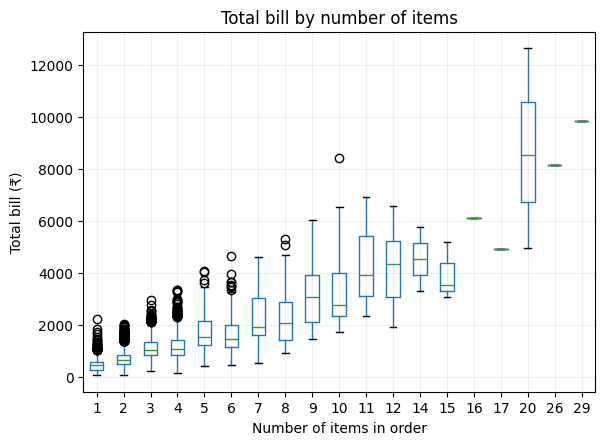

In [1757]:
from matplotlib import pyplot as plt


plt.figure(figsize=(10, 5))
df.boxplot(column="Total", by="num_items")
plt.xlabel("Number of items in order")
plt.ylabel("Total bill (₹)")
plt.title("Total bill by number of items")
plt.suptitle("")  # remove automatic pandas subtitle
plt.grid(True, alpha=0.2)
plt.show()


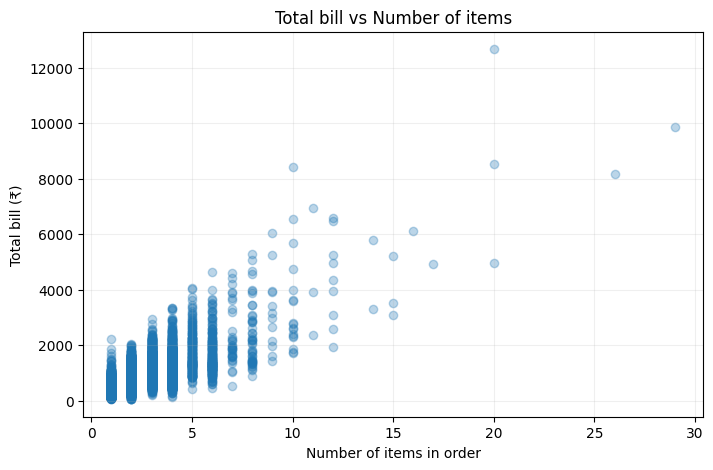

In [1758]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df["num_items"], df["Total"], alpha=0.3)
plt.xlabel("Number of items in order")
plt.ylabel("Total bill (₹)")
plt.title("Total bill vs Number of items")
plt.grid(True, alpha=0.2)
plt.show()


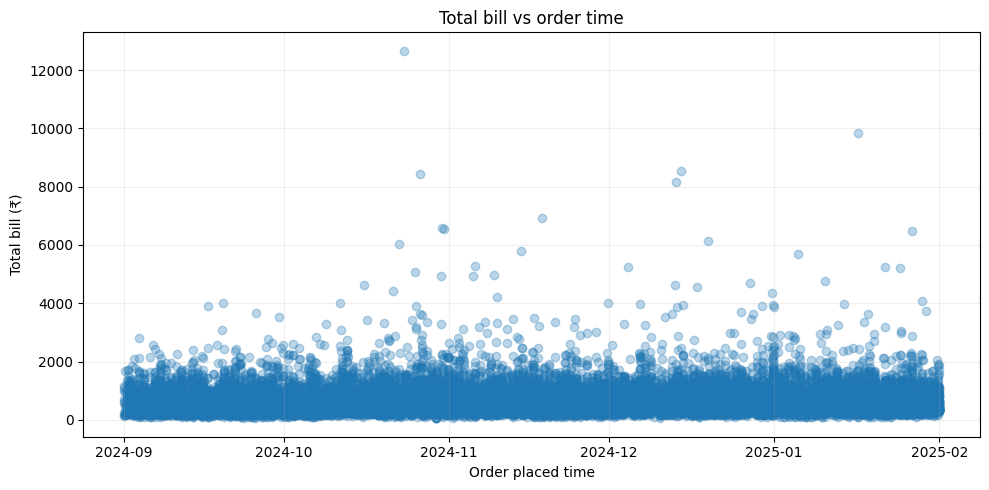

In [1759]:
plt.figure(figsize=(10,5))
plt.scatter(df["Order Placed At"], df["Total"], alpha=0.3)
plt.xlabel("Order placed time")
plt.ylabel("Total bill (₹)")
plt.title("Total bill vs order time")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

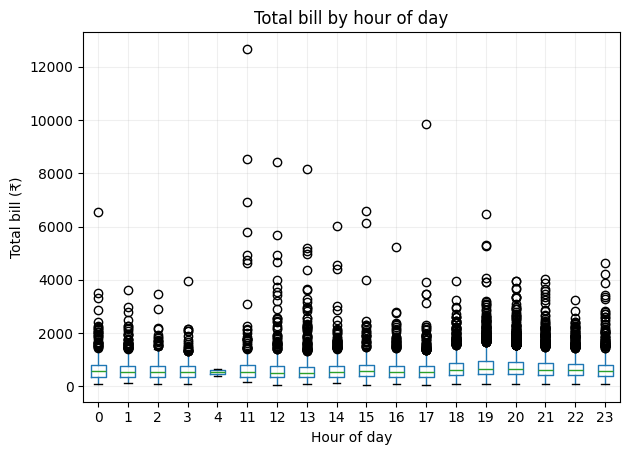

In [1760]:
df["order_hour"] = df["Order Placed At"].dt.hour

plt.figure(figsize=(10,5))
df.boxplot(column="Total", by="order_hour")
plt.xlabel("Hour of day")
plt.ylabel("Total bill (₹)")
plt.title("Total bill by hour of day")
plt.suptitle("")  # remove default subtitle
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


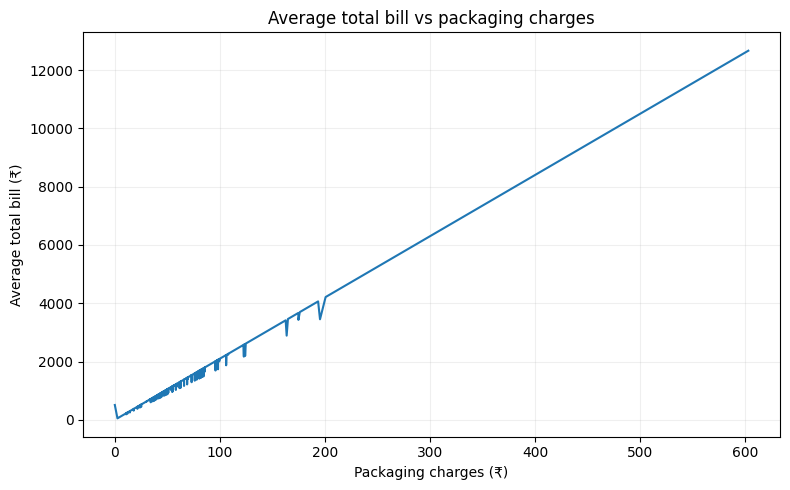

In [1761]:
import matplotlib.pyplot as plt

# 1. Group by packaging charge and take mean total bill
pack_summary = (
    df.groupby("Packaging charges", as_index=False)["Total"]
      .mean()
      .sort_values("Packaging charges")
)

# 2. Line plot: avg Total vs Packaging charges
plt.figure(figsize=(8,5))
plt.plot(pack_summary["Packaging charges"], pack_summary["Total"])
plt.xlabel("Packaging charges (₹)")
plt.ylabel("Average total bill (₹)")
plt.title("Average total bill vs packaging charges")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


In [1762]:
import numpy as np

subzone_cols = [
    "Subzone_Chittaranjan Park",
    "Subzone_DLF Phase 1",
    "Subzone_Greater Kailash 2 (GK2)",
    "Subzone_Sector 135",
    "Subzone_Sector 4",
    "Subzone_Shahdara",
    "Subzone_Sikandarpur",
    "Subzone_Vasant Kunj",
]

# get the column name where the dummy == 1, then strip the "Subzone_" prefix
df["Subzone"] = (
    df[subzone_cols]
    .idxmax(axis=1)                     # e.g. "Subzone_Sector 4"
    .str.replace("Subzone_", "", regex=False)  # e.g. "Sector 4"
)


<Figure size 1000x500 with 0 Axes>

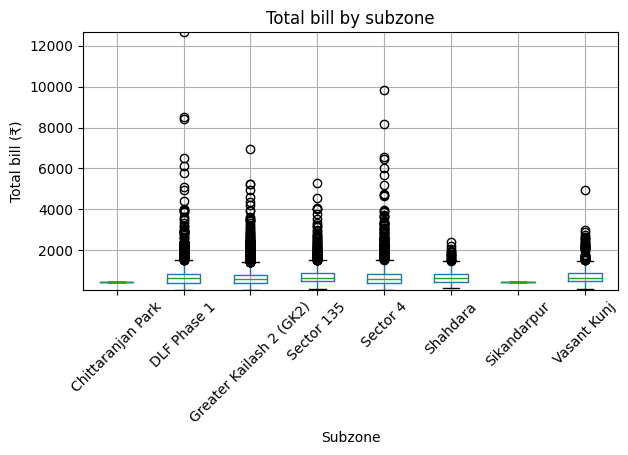

In [1763]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df.boxplot(column="Total", by="Subzone")
plt.xlabel("Subzone")
plt.ylabel("Total bill (₹)")
plt.title("Total bill by subzone")
plt.suptitle("")
plt.xticks(rotation=45)

# show full range of Total
plt.ylim(df["Total"].min(), df["Total"].max())

plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

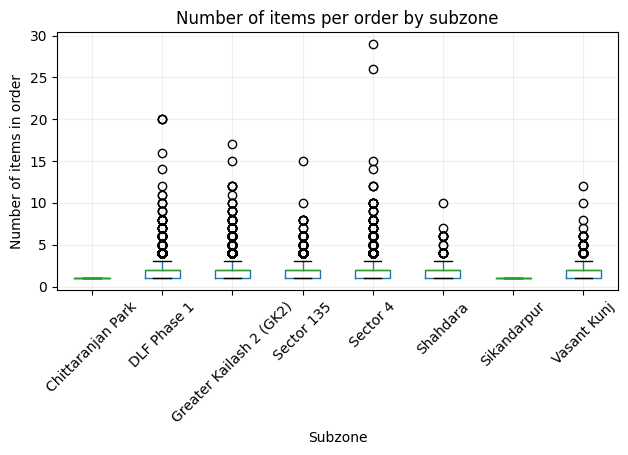

In [1764]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df.boxplot(column="num_items", by="Subzone")
plt.xlabel("Subzone")
plt.ylabel("Number of items in order")
plt.title("Number of items per order by subzone")
plt.suptitle("")  # remove pandas subtitle
plt.xticks(rotation=45)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


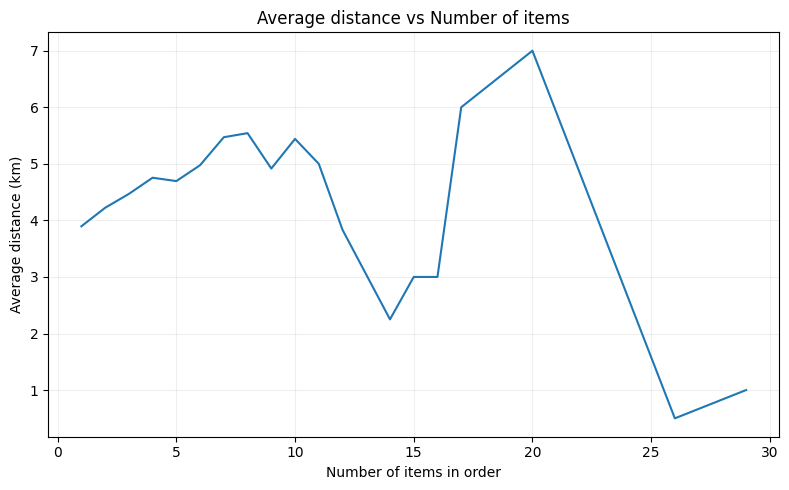

In [1765]:
import matplotlib.pyplot as plt

# group by num_items and compute mean distance
dist_summary = (
    df.groupby("num_items", as_index=False)["Distance_km"]
      .mean()
      .sort_values("num_items")
)

plt.figure(figsize=(8,5))
plt.plot(dist_summary["num_items"], dist_summary["Distance_km"])
plt.xlabel("Number of items in order")
plt.ylabel("Average distance (km)")
plt.title("Average distance vs Number of items")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


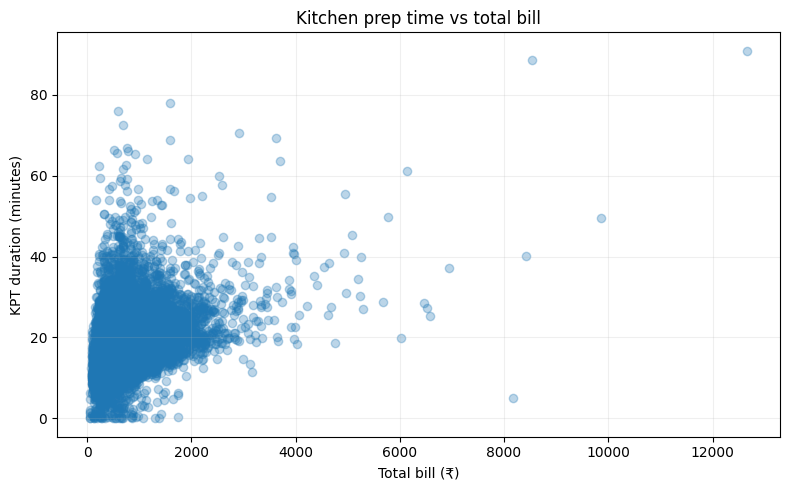

In [1766]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["Total"], df["KPT duration (minutes)"], alpha=0.3)
plt.xlabel("Total bill (₹)")
plt.ylabel("KPT duration (minutes)")
plt.title("Kitchen prep time vs total bill")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_65176/1969857877.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Total_bin")["KPT duration (minutes)"]


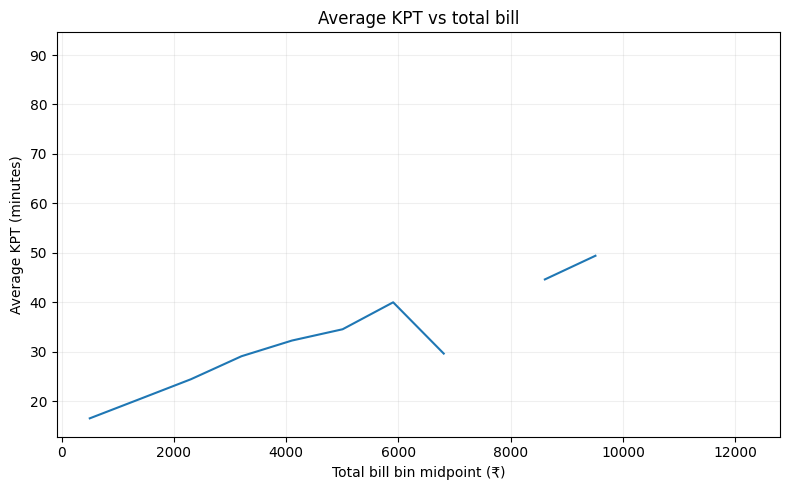

In [1767]:
import numpy as np

# define price bins (you can tweak these)
bins = np.linspace(df["Total"].min(), df["Total"].max(), 15)
labels = 0.5 * (bins[:-1] + bins[1:])  # midpoints for plotting

df["Total_bin"] = pd.cut(df["Total"], bins=bins, include_lowest=True)

kpt_by_bin = (
    df.groupby("Total_bin")["KPT duration (minutes)"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(8,5))
plt.plot(labels, kpt_by_bin["KPT duration (minutes)"])
plt.xlabel("Total bill bin midpoint (₹)")
plt.ylabel("Average KPT (minutes)")
plt.title("Average KPT vs total bill")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# optional: drop helper column
df = df.drop(columns=["Total_bin"])


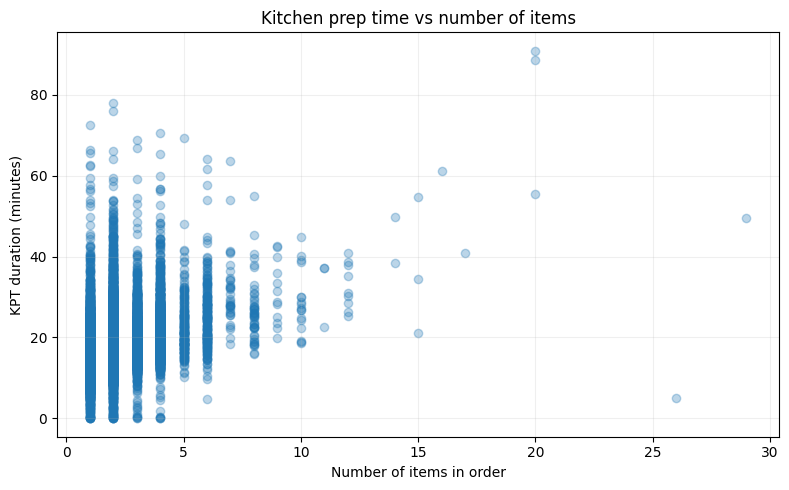

In [1768]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["num_items"], df["KPT duration (minutes)"], alpha=0.3)
plt.xlabel("Number of items in order")
plt.ylabel("KPT duration (minutes)")
plt.title("Kitchen prep time vs number of items")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


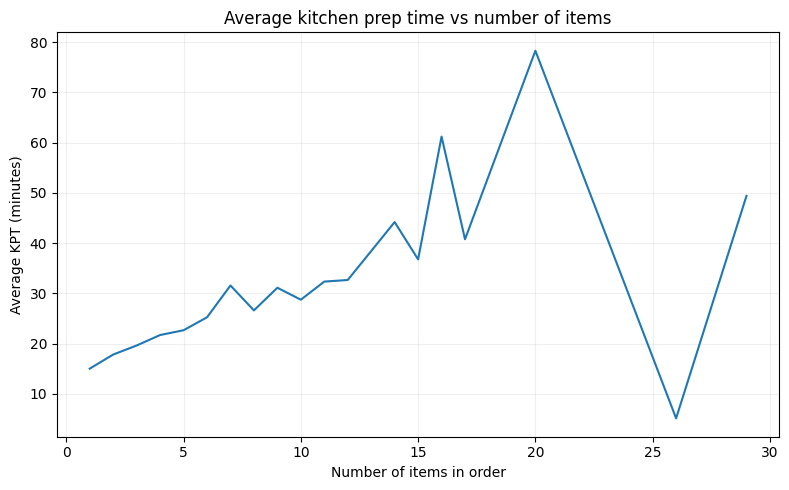

In [1769]:
kpt_by_items = (
    df.groupby("num_items", as_index=False)["KPT duration (minutes)"]
      .mean()
      .sort_values("num_items")
)

plt.figure(figsize=(8,5))
plt.plot(kpt_by_items["num_items"], kpt_by_items["KPT duration (minutes)"])
plt.xlabel("Number of items in order")
plt.ylabel("Average KPT (minutes)")
plt.title("Average kitchen prep time vs number of items")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

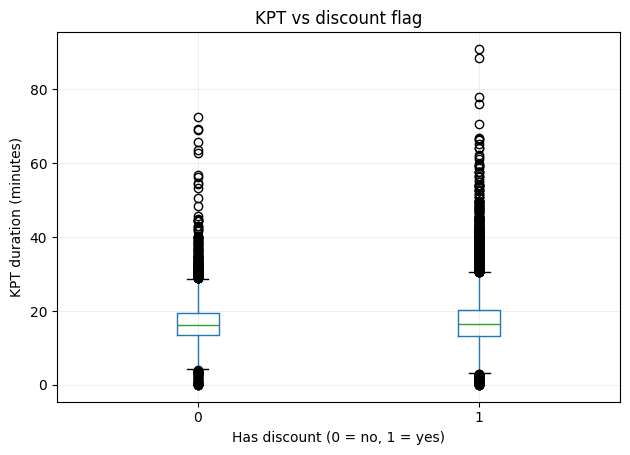

In [1770]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
df.boxplot(
    column="KPT duration (minutes)",
    by="has_discount"
)
plt.xlabel("Has discount (0 = no, 1 = yes)")
plt.ylabel("KPT duration (minutes)")
plt.title("KPT vs discount flag")
plt.suptitle("")  # remove extra title
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


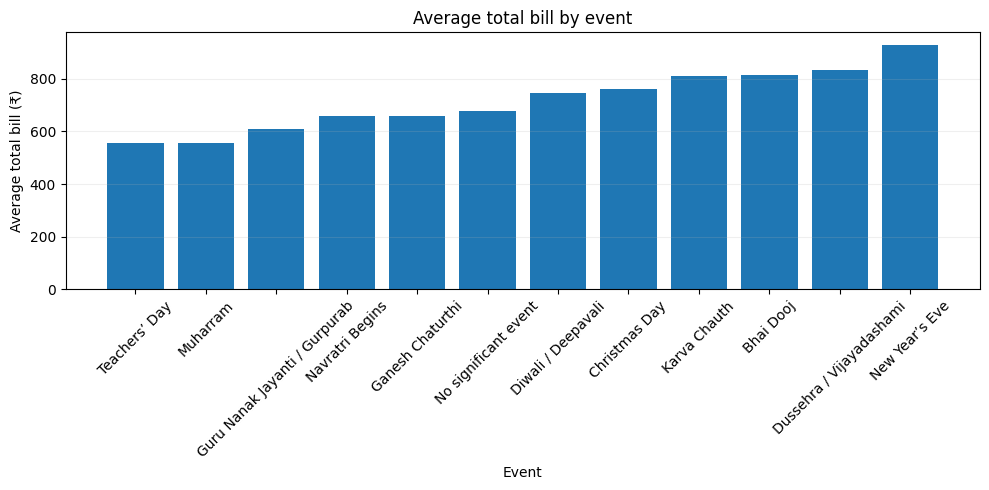

In [1771]:
avg_total_event = (
    df.groupby("event")["Total"]
      .mean()
      .sort_values()
)

plt.figure(figsize=(10,5))
plt.bar(avg_total_event.index, avg_total_event.values)
plt.xlabel("Event")
plt.ylabel("Average total bill (₹)")
plt.title("Average total bill by event")
plt.xticks(rotation=45)
plt.grid(True, axis="y", alpha=0.2)
plt.tight_layout()
plt.show()


In [1772]:
# 1 if there is some event that day, 0 if "No significant event"
df["has_event"] = (df["event"] != "No significant event").astype(int)


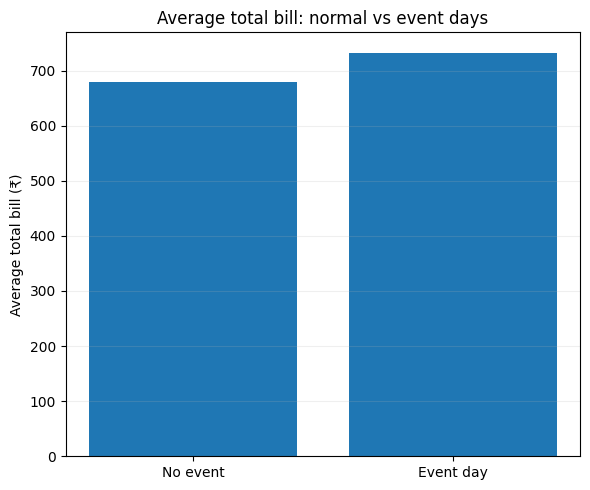

In [1773]:
avg_total_event = (
    df.groupby("has_event")["Total"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(6,5))
plt.bar(avg_total_event["has_event"], avg_total_event["Total"])
plt.xticks([0, 1], ["No event", "Event day"])
plt.ylabel("Average total bill (₹)")
plt.title("Average total bill: normal vs event days")
plt.grid(True, axis="y", alpha=0.2)
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

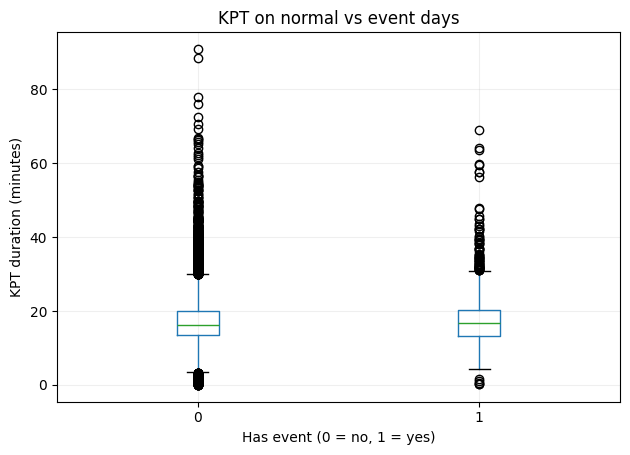

In [1774]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
df.boxplot(column="KPT duration (minutes)", by="has_event")
plt.xlabel("Has event (0 = no, 1 = yes)")
plt.ylabel("KPT duration (minutes)")
plt.title("KPT on normal vs event days")
plt.suptitle("")  # remove extra pandas title
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


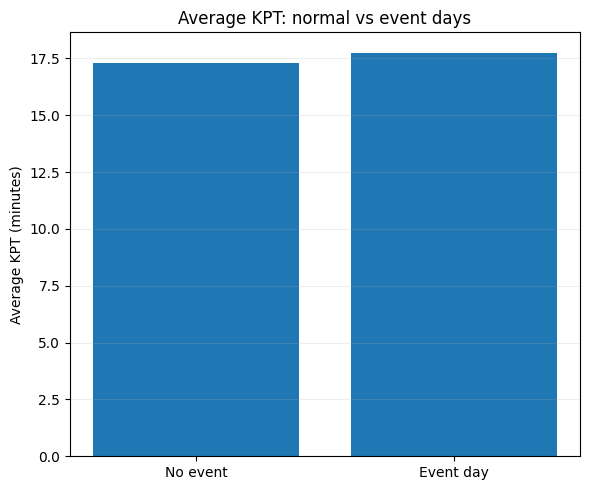

In [1775]:
kpt_event = (
    df.groupby("has_event")["KPT duration (minutes)"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(6,5))
plt.bar(kpt_event["has_event"], kpt_event["KPT duration (minutes)"])
plt.xticks([0, 1], ["No event", "Event day"])
plt.ylabel("Average KPT (minutes)")
plt.title("Average KPT: normal vs event days")
plt.grid(True, axis="y", alpha=0.2)
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

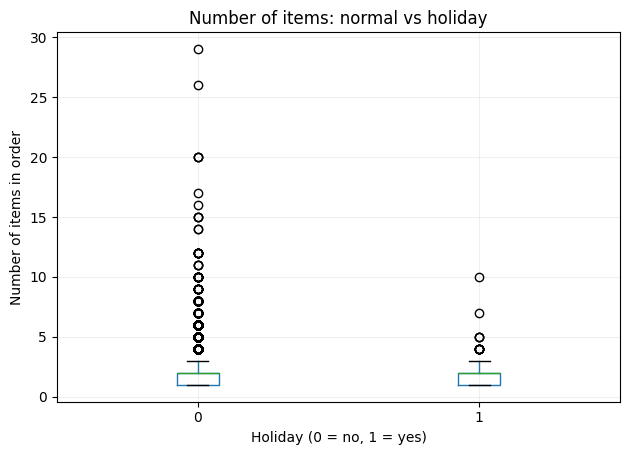

In [1776]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
df.boxplot(column="num_items", by="holiday")
plt.xlabel("Holiday (0 = no, 1 = yes)")
plt.ylabel("Number of items in order")
plt.title("Number of items: normal vs holiday")
plt.suptitle("")  # remove extra pandas subtitle
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

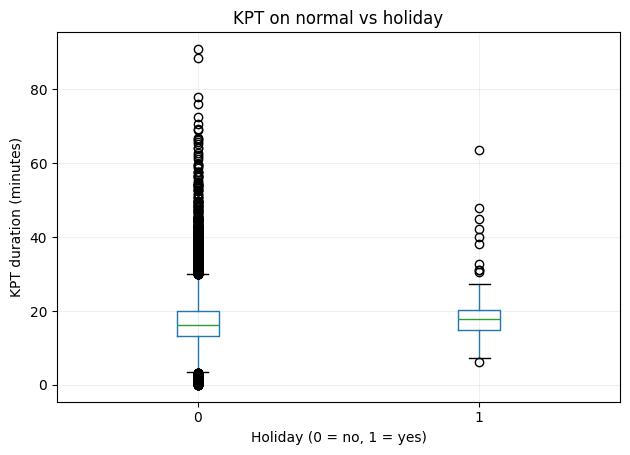

In [1777]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
df.boxplot(column="KPT duration (minutes)", by="holiday")
plt.xlabel("Holiday (0 = no, 1 = yes)")
plt.ylabel("KPT duration (minutes)")
plt.title("KPT on normal vs holiday")
plt.suptitle("")  # remove extra pandas subtitle
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


In [1778]:
df["hour_utc"] = df["order_hour_utc"].dt.hour


<Figure size 1000x500 with 0 Axes>

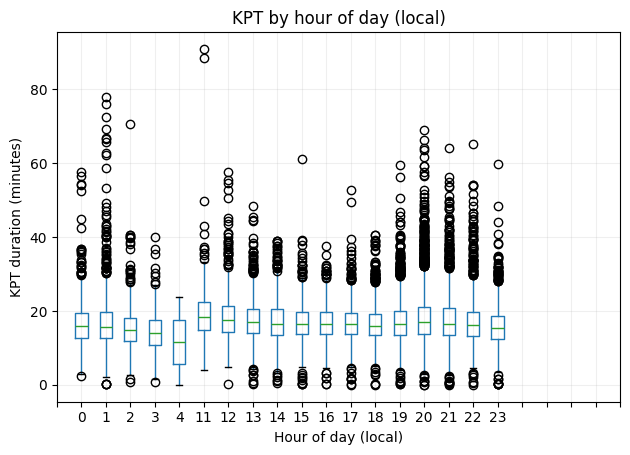

In [1779]:
import matplotlib.pyplot as plt

# Create local hour column if not already present
df["hour_local"] = order_local.dt.hour

plt.figure(figsize=(10,5))
df.boxplot(column="KPT duration (minutes)", by="hour_local")
plt.xlabel("Hour of day (local)")
plt.ylabel("KPT duration (minutes)")
plt.title("KPT by hour of day (local)")
plt.suptitle("")  # remove pandas' extra title
plt.xticks(range(24))
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

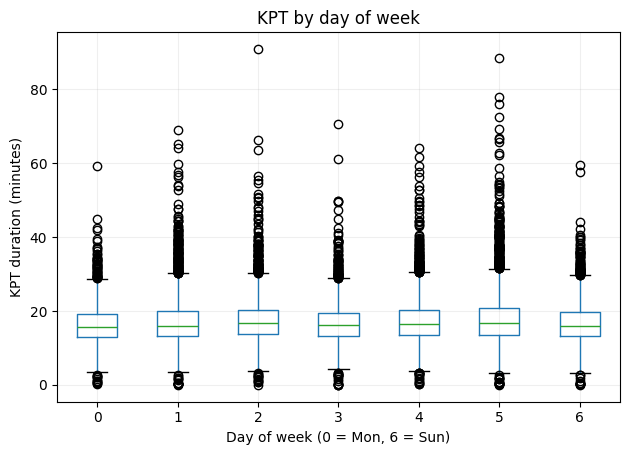

In [1780]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df.boxplot(column="KPT duration (minutes)", by="order_dayofweek")
plt.xlabel("Day of week (0 = Mon, 6 = Sun)")
plt.ylabel("KPT duration (minutes)")
plt.title("KPT by day of week")
plt.suptitle("")  # remove pandas extra title
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


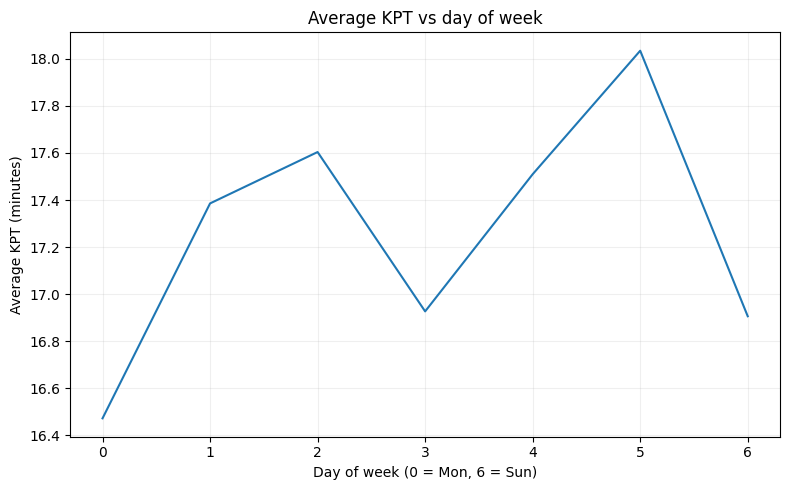

In [1781]:
kpt_by_dow = (
    df.groupby("order_dayofweek")["KPT duration (minutes)"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(8,5))
plt.plot(kpt_by_dow["order_dayofweek"], kpt_by_dow["KPT duration (minutes)"])
plt.xlabel("Day of week (0 = Mon, 6 = Sun)")
plt.ylabel("Average KPT (minutes)")
plt.title("Average KPT vs day of week")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

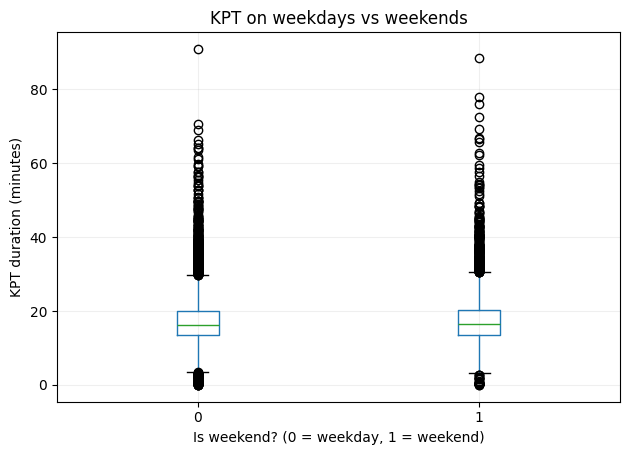

In [1782]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
df.boxplot(column="KPT duration (minutes)", by="is_weekend")
plt.xlabel("Is weekend? (0 = weekday, 1 = weekend)")
plt.ylabel("KPT duration (minutes)")
plt.title("KPT on weekdays vs weekends")
plt.suptitle("")  # remove extra pandas title
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


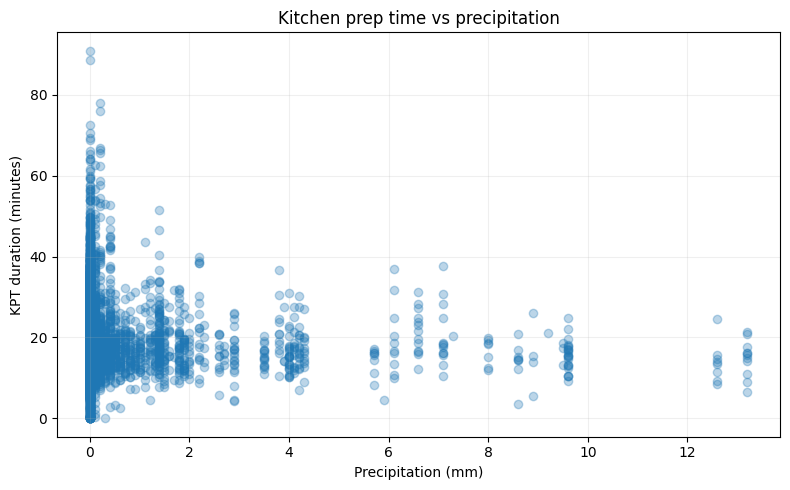

In [1783]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["wx_precip_mm"], df["KPT duration (minutes)"], alpha=0.3)
plt.xlabel("Precipitation (mm)")
plt.ylabel("KPT duration (minutes)")
plt.title("Kitchen prep time vs precipitation")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_65176/2371515451.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("precip_bin")["KPT duration (minutes)"]


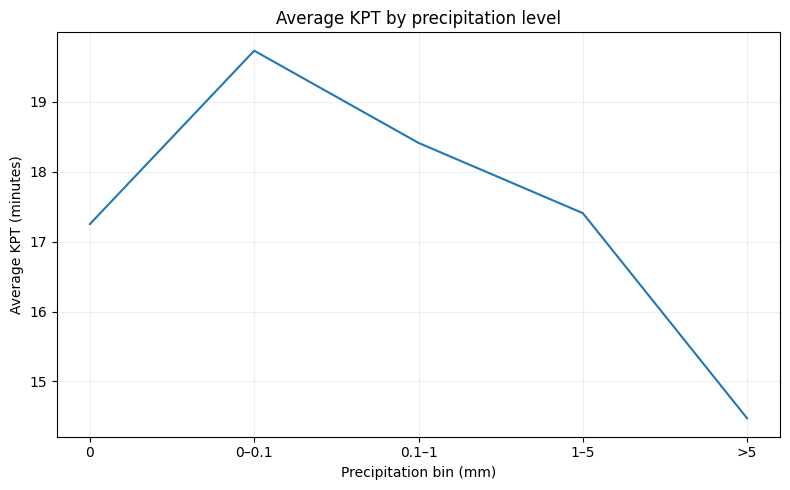

In [1784]:
import numpy as np

# Define bins for precipitation
bins = [0, 0.1, 1, 5, 10, df["wx_precip_mm"].max()]
labels = ["0", "0–0.1", "0.1–1", "1–5", ">5"]

df["precip_bin"] = pd.cut(df["wx_precip_mm"], bins=bins, labels=labels, include_lowest=True)

kpt_by_precip = (
    df.groupby("precip_bin")["KPT duration (minutes)"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(8,5))
plt.plot(kpt_by_precip["precip_bin"], kpt_by_precip["KPT duration (minutes)"])
plt.xlabel("Precipitation bin (mm)")
plt.ylabel("Average KPT (minutes)")
plt.title("Average KPT by precipitation level")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# optional cleanup
df = df.drop(columns=["precip_bin"])


<Figure size 600x500 with 0 Axes>

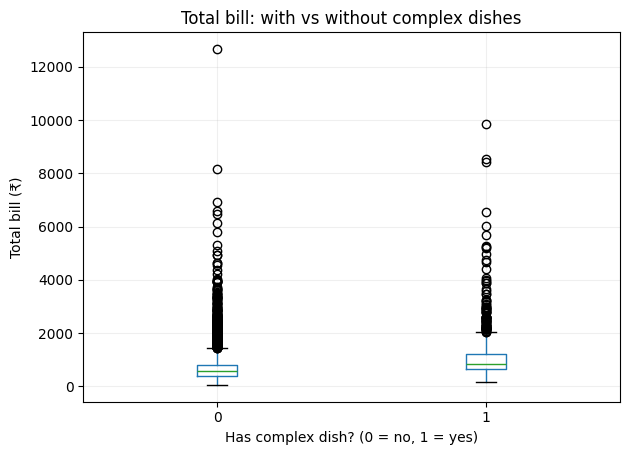

In [1785]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
df.boxplot(column="Total", by="has_complex_dish")
plt.xlabel("Has complex dish? (0 = no, 1 = yes)")
plt.ylabel("Total bill (₹)")
plt.title("Total bill: with vs without complex dishes")
plt.suptitle("")  # remove extra pandas title
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

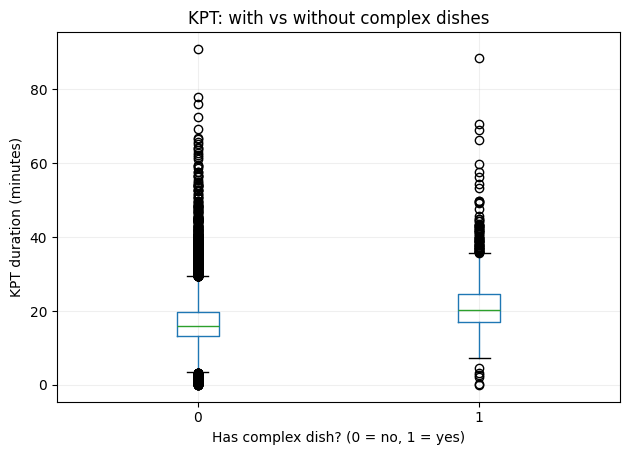

In [1786]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
df.boxplot(column="KPT duration (minutes)", by="has_complex_dish")
plt.xlabel("Has complex dish? (0 = no, 1 = yes)")
plt.ylabel("KPT duration (minutes)")
plt.title("KPT: with vs without complex dishes")
plt.suptitle("")  # remove extra pandas title
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


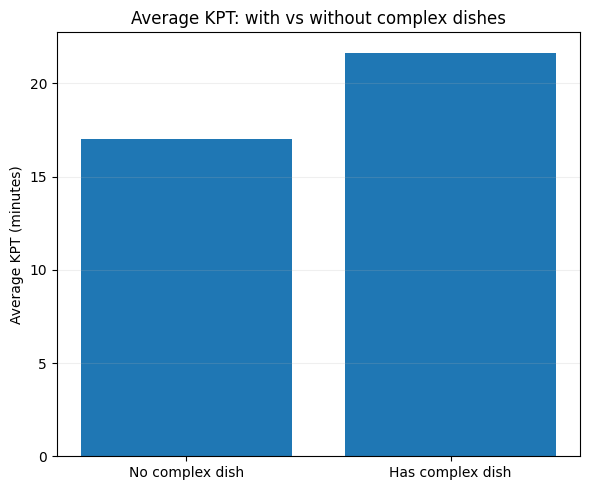

In [1787]:
kpt_complex = (
    df.groupby("has_complex_dish")["KPT duration (minutes)"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(6,5))
plt.bar(kpt_complex["has_complex_dish"], kpt_complex["KPT duration (minutes)"])
plt.xticks([0, 1], ["No complex dish", "Has complex dish"])
plt.ylabel("Average KPT (minutes)")
plt.title("Average KPT: with vs without complex dishes")
plt.grid(True, axis="y", alpha=0.2)
plt.tight_layout()
plt.show()


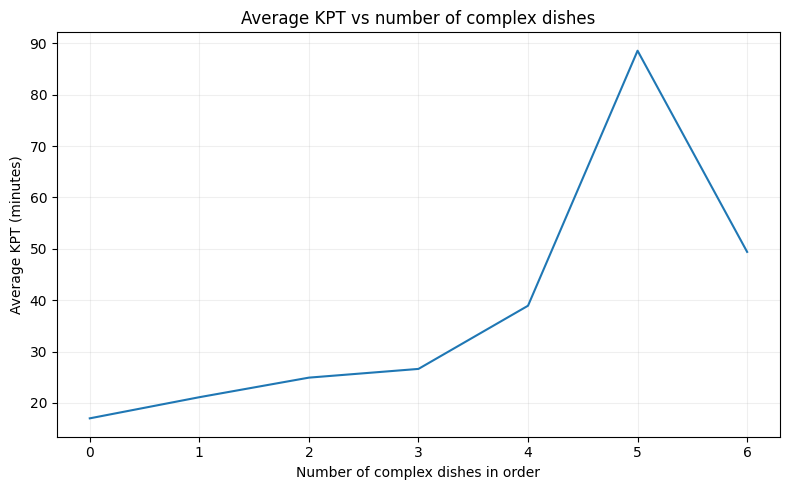

   num_complex_dishes  KPT duration (minutes)
0                   0               16.994753
1                   1               21.110193
2                   2               24.919481
3                   3               26.617826
4                   4               38.920000
5                   5               88.570000
6                   6               49.400000


In [1788]:
import matplotlib.pyplot as plt

kpt_by_complex = (
    df.groupby("num_complex_dishes")["KPT duration (minutes)"]
      .mean()
      .reset_index()
      .sort_values("num_complex_dishes")
)

plt.figure(figsize=(8,5))
plt.plot(
    kpt_by_complex["num_complex_dishes"],
    kpt_by_complex["KPT duration (minutes)"]
)
plt.xlabel("Number of complex dishes in order")
plt.ylabel("Average KPT (minutes)")
plt.title("Average KPT vs number of complex dishes")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

print(kpt_by_complex)


In [1789]:
df["num_complex_dishes"].value_counts()


num_complex_dishes
0    19499
1     1347
2      154
3       23
4        1
5        1
6        1
Name: count, dtype: int64

In [1790]:
df["num_complex_capped"] = df["num_complex_dishes"].clip(upper=3)
# or upper=4 if you want a "4+" bucket, but 4,5,6 are all 1 row anyway


In [1791]:
df["total_discount_amt"] = (
    df["Restaurant discount (Promo)"]
  + df["Restaurant discount (Flat offs, Freebies & others)"]
  + df["Gold discount"]
  + df["Brand pack discount"]
)


In [1792]:
df = df.drop(
    columns=[
        "Restaurant discount (Promo)",
        "Restaurant discount (Flat offs, Freebies & others)",
        "Gold discount",
        "Brand pack discount",
    ],
    errors="ignore"
)


In [1793]:
df.dtypes

Restaurant ID                               int64
Order ID                                    int64
Order Placed At                    datetime64[ns]
Bill subtotal                             float64
Packaging charges                         float64
Total                                     float64
KPT duration (minutes)                    float64
Rider wait time (minutes)                 float64
Order Ready Marked                         object
Subzone_Chittaranjan Park                   int64
Subzone_DLF Phase 1                         int64
Subzone_Greater Kailash 2 (GK2)             int64
Subzone_Sector 135                          int64
Subzone_Sector 4                            int64
Subzone_Shahdara                            int64
Subzone_Sikandarpur                         int64
Subzone_Vasant Kunj                         int64
Distance_km                               float64
num_complex_dishes                          int64
has_complex_dish                            int64


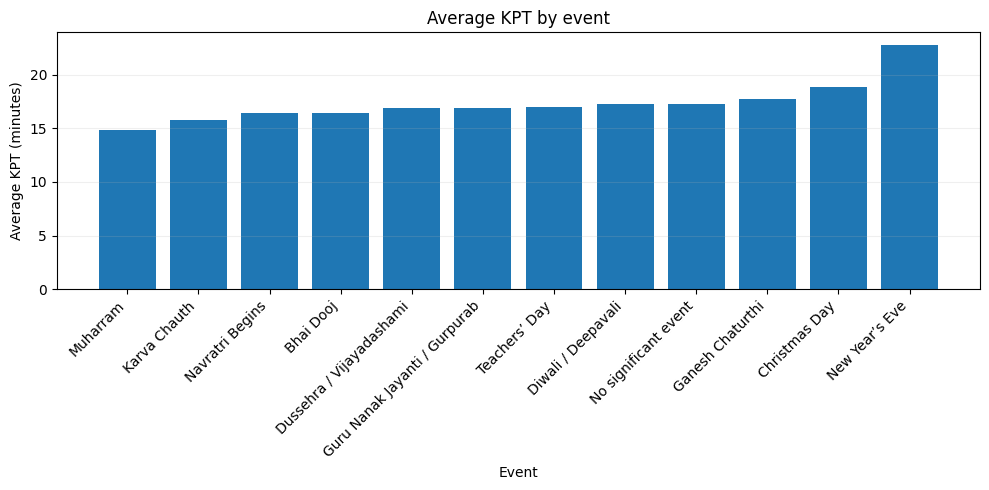

In [1794]:
import matplotlib.pyplot as plt

kpt_event = (
    df.groupby("event")["KPT duration (minutes)"]
      .mean()
      .sort_values()        # sort by avg KPT
)

plt.figure(figsize=(10,5))
plt.bar(kpt_event.index, kpt_event.values)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Event")
plt.ylabel("Average KPT (minutes)")
plt.title("Average KPT by event")
plt.grid(True, axis="y", alpha=0.2)
plt.tight_layout()
plt.show()


In [1795]:
import pandas as pd

df = pd.get_dummies(
    df,
    columns=["event"],
    prefix="event",
    drop_first=True   # "No significant event" becomes the baseline
)


In [1796]:
df = df.drop(columns=["Subzone"], errors="ignore")


In [1797]:
event_cols = [
    "event_Christmas Day",
    "event_Diwali / Deepavali",
    "event_Dussehra / Vijayadashami",
    "event_Ganesh Chaturthi",
    "event_Guru Nanak Jayanti / Gurpurab",
    "event_Karva Chauth",
    "event_Muharram",
    "event_Navratri Begins",
    "event_New Year’s Eve",
    "event_No significant event",
    "event_Teachers’ Day",
]

df[event_cols] = df[event_cols].astype(int)


In [1798]:
df["Order Ready Marked"].value_counts()


Order Ready Marked
Correctly      19087
Incorrectly     1895
Missed            44
Name: count, dtype: int64

In [1799]:
df = df.drop(columns=["Order Ready Marked"], errors="ignore")


In [1800]:
df.dtypes

Restaurant ID                                   int64
Order ID                                        int64
Order Placed At                        datetime64[ns]
Bill subtotal                                 float64
Packaging charges                             float64
Total                                         float64
KPT duration (minutes)                        float64
Rider wait time (minutes)                     float64
Subzone_Chittaranjan Park                       int64
Subzone_DLF Phase 1                             int64
Subzone_Greater Kailash 2 (GK2)                 int64
Subzone_Sector 135                              int64
Subzone_Sector 4                                int64
Subzone_Shahdara                                int64
Subzone_Sikandarpur                             int64
Subzone_Vasant Kunj                             int64
Distance_km                                   float64
num_complex_dishes                              int64
has_complex_dish            

df2

In [1801]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import HistGradientBoostingRegressor

# Work on a copy
df2 = df.copy()
target_col = "KPT duration (minutes)"


In [1802]:
# Main datetime column we'll use
df2['order_datetime'] = pd.to_datetime(df2['Order Placed At'])

# Drop rows where target or datetime is missing
df2 = df2.dropna(subset=[target_col, 'order_datetime'])


In [1803]:
df2['order_hour'] = df2['order_datetime'].dt.hour
df2['order_dayofweek'] = df2['order_datetime'].dt.dayofweek  # Monday=0
df2['is_weekend'] = df2['order_dayofweek'].isin([5, 6]).astype(int)


In [1804]:
# If hour_local is local hour, you can use that; otherwise use order_hour
df2['is_lunch_peak'] = df2['hour_local'].between(12, 14).astype(int)
df2['is_dinner_peak'] = df2['hour_local'].between(19, 22).astype(int)
df2['is_peak_hour'] = ((df2['is_lunch_peak'] == 1) | (df2['is_dinner_peak'] == 1)).astype(int)


In [1805]:
# Mean KPT per restaurant
df2['rest_mean_KPT'] = df2.groupby('Restaurant ID')[target_col].transform('mean')

# 75th percentile KPT per restaurant
df2['rest_p75_KPT'] = df2.groupby('Restaurant ID')[target_col].transform(
    lambda x: x.quantile(0.75)
)

# Mean rider wait per restaurant (since you have this)
df2['rest_mean_wait'] = df2.groupby('Restaurant ID')['Rider wait time (minutes)'].transform('mean')


In [1806]:
# Take restaurant + time
tmp = df2[['Restaurant ID', 'order_datetime']].copy()
tmp = tmp.set_index('order_datetime')

# Add a dummy column to count
tmp['order_count'] = 1

# Sort by index for monotonicity
tmp = tmp.sort_index()

# Rolling sum of dummy = number of orders in that window
load = (
    tmp.groupby('Restaurant ID')
       .rolling('30min')['order_count']
       .sum()
       .rename('orders_last_30min')
       .reset_index()
)


# Merge back
df2 = df2.merge(load, on=['Restaurant ID', 'order_datetime'], how='left')

# Exclude the current order itself from the count
df2['orders_last_30min'] = df2['orders_last_30min'] - 1
df2['orders_last_30min'] = df2['orders_last_30min'].clip(lower=0)


In [1807]:
# Clip extreme outliers (tweak 90 if you want)
df2['KPT_clipped'] = df2[target_col].clip(upper=90)

# log1p = log(KPT + 1)
df2['log_KPT'] = np.log1p(df2['KPT_clipped'])


In [1808]:
import numpy as np

# 1) Average item value (protect against division by 0)
df2["avg_item_value"] = df2["Total"] / df2["num_items"].clip(lower=1)

# 2) Complexity ratio
df2["complexity_ratio"] = df2["num_complex_dishes"] / df2["num_items"].clip(lower=1)

# 3) Big order flag
df2["is_big_order"] = (df2["num_items"] >= 6).astype(int)   # change 6 if you want

# 4) High value order flag (75th percentile of Total)
high_total_thresh = df2["Total"].quantile(0.75)
df2["is_high_value_order"] = (df2["Total"] >= high_total_thresh).astype(int)

# 5) High load flag
df2["is_high_load"] = (df2["orders_last_30min"] >= 5).astype(int)

# 6) Peak * weekend interaction
df2["is_peak_weekend"] = ((df2["is_peak_hour"] == 1) & (df2["is_weekend"] == 1)).astype(int)

# 7) Cyclic hour features (use local hour)
df2["order_hour_sin"] = np.sin(2 * np.pi * df2["hour_local"] / 24)
df2["order_hour_cos"] = np.cos(2 * np.pi * df2["hour_local"] / 24)


In [1809]:
df2.columns

Index(['Restaurant ID', 'Order ID', 'Order Placed At', 'Bill subtotal',
       'Packaging charges', 'Total', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Subzone_Chittaranjan Park',
       'Subzone_DLF Phase 1', 'Subzone_Greater Kailash 2 (GK2)',
       'Subzone_Sector 135', 'Subzone_Sector 4', 'Subzone_Shahdara',
       'Subzone_Sikandarpur', 'Subzone_Vasant Kunj', 'Distance_km',
       'num_complex_dishes', 'has_complex_dish', 'num_items', 'has_discount',
       'disc_bundle', 'disc_flat', 'disc_none', 'disc_percent', 'holiday',
       'order_hour_utc', 'wx_temp_c', 'wx_precip_mm', 'wx_cloud_cover_pct',
       'order_hour', 'order_dayofweek', 'is_weekend', 'has_event', 'hour_utc',
       'hour_local', 'num_complex_capped', 'total_discount_amt',
       'event_Christmas Day', 'event_Diwali / Deepavali',
       'event_Dussehra / Vijayadashami', 'event_Ganesh Chaturthi',
       'event_Guru Nanak Jayanti / Gurpurab', 'event_Karva Chauth',
       'event_Muharram', 'event_

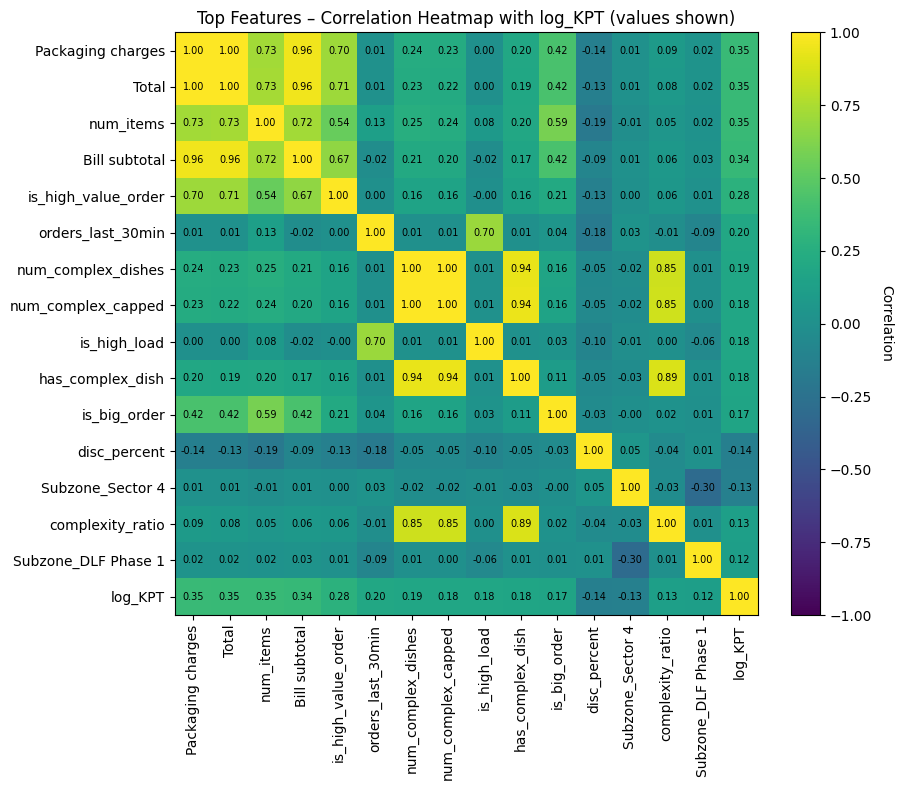

In [1810]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Correlation matrix of selected features + log_KPT
corr_cols = selected_features + ["log_KPT"]
corr_sel = df2[corr_cols].corr()

# 2. Take top 15 features by |corr with log_KPT|
log_corr = corr_sel["log_KPT"].drop("log_KPT")
top_feats = log_corr.abs().sort_values(ascending=False).head(15).index.tolist()

# 3. Subset the correlation matrix to these + log_KPT
corr_top = corr_sel.loc[top_feats + ["log_KPT"], top_feats + ["log_KPT"]]

# 4. Plot heatmap + numbers
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr_top, vmin=-1, vmax=1)

# Colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Correlation", rotation=270, labelpad=15)

# Ticks and labels
ax.set_xticks(np.arange(len(corr_top.columns)))
ax.set_yticks(np.arange(len(corr_top.index)))
ax.set_xticklabels(corr_top.columns, rotation=90)
ax.set_yticklabels(corr_top.index)

# Add numbers in each cell
for i in range(corr_top.shape[0]):
    for j in range(corr_top.shape[1]):
        val = corr_top.iloc[i, j]
        ax.text(
            j, i, f"{val:.2f}",
            ha="center", va="center",
            color="black", fontsize=7
        )

ax.set_title("Top Features – Correlation Heatmap with log_KPT (values shown)")
plt.tight_layout()
plt.show()


In [1811]:
# 1. Use df2 directly
selected_features = [
    # --- Price / size ---
    "Packaging charges",
    "Total",
    "num_items",
    "total_discount_amt",

    # --- Order complexity ---
    "num_complex_dishes",
    "complexity_ratio",

    # --- Discounts ---
    "has_discount",
    "disc_bundle",
    "disc_flat",
    "disc_percent",          # drop disc_none (baseline)

    # --- Time & calendar ---
    "order_hour",
    "order_dayofweek",
    "is_weekend",
    "holiday",
    "has_event",
    "is_peak_hour",          # drop is_lunch_peak, is_dinner_peak
    "hour_local",            # drop hour_utc

    # --- Location (subzones with signal) ---
    "Subzone_DLF Phase 1",
    "Subzone_Greater Kailash 2 (GK2)",
    "Subzone_Sector 135",
    "Subzone_Sector 4",
    "Subzone_Shahdara",
    "Subzone_Vasant Kunj",
    "Subzone_Chittaranjan Park",
    "Subzone_Sikandarpur",

    # --- Distance & weather ---
    "Distance_km",
    "wx_temp_c",
    "wx_precip_mm",
    "wx_cloud_cover_pct",

    # --- Events (drop 'No significant event' as baseline) ---
    "event_New Year’s Eve",
    "event_Christmas Day",
    "event_Diwali / Deepavali",
    "event_Dussehra / Vijayadashami",
    "event_Ganesh Chaturthi",
    "event_Guru Nanak Jayanti / Gurpurab",
    "event_Karva Chauth",
    "event_Muharram",
    "event_Navratri Begins",
    "event_Teachers’ Day",

    # --- Load ---
    "orders_last_30min",

    # --- Engineered, non-leaky ---
    "is_high_value_order",
    "is_high_load",
]



X = df2[selected_features].copy()
y_log = df2['log_KPT']   # training target



In [1812]:
# 2. Train / test split + model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)



In [1813]:
target_col = "KPT duration (minutes)"

# 1. Get Restaurant IDs for rows in train/test
rest_id_train = df2.loc[X_train.index, "Restaurant ID"]
rest_id_test  = df2.loc[X_test.index, "Restaurant ID"]

# 2. Group only on TRAIN data
train_slice = df2.loc[X_train.index]

rest_groups = train_slice.groupby("Restaurant ID")

# Train-only stats
rest_mean_map   = rest_groups[target_col].mean()
rest_p75_map    = rest_groups[target_col].quantile(0.75)
rest_wait_map   = rest_groups["Rider wait time (minutes)"].mean()

# Global fallbacks (for restaurants not seen in train)
global_mean_kpt  = rest_mean_map.mean()
global_p75_kpt   = rest_p75_map.mean()
global_mean_wait = rest_wait_map.mean()


In [1814]:
# Train set
X_train["rest_mean_KPT"] = rest_id_train.map(rest_mean_map).fillna(global_mean_kpt).values
X_train["rest_p75_KPT"]  = rest_id_train.map(rest_p75_map).fillna(global_p75_kpt).values
X_train["rest_mean_wait"] = rest_id_train.map(rest_wait_map).fillna(global_mean_wait).values

# Test set
X_test["rest_mean_KPT"] = rest_id_test.map(rest_mean_map).fillna(global_mean_kpt).values
X_test["rest_p75_KPT"]  = rest_id_test.map(rest_p75_map).fillna(global_p75_kpt).values
X_test["rest_mean_wait"] = rest_id_test.map(rest_wait_map).fillna(global_mean_wait).values


In [1815]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [1816]:
def mae_minutes_scorer(estimator, X, y_log_true):
    """
    Custom scorer for RandomizedSearchCV:
    - estimator: pipeline (scaler + model)
    - X: features
    - y_log_true: true log_KPT values

    Returns NEGATIVE MAE in minutes (because sklearn maximizes the score).
    """
    y_log_pred = estimator.predict(X)
    y_true = np.expm1(y_log_true)
    y_pred = np.expm1(y_log_pred)
    return -mean_absolute_error(y_true, y_pred)


In [1817]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

models_and_params = {
    "ElasticNet": {
        "pipeline": Pipeline([
            ("scaler", StandardScaler()),
            ("model", ElasticNet(max_iter=5000, random_state=42))
        ]),
        "params": {
            "model__alpha": np.logspace(-3, 1, 5),   # 0.001 ... 10
            "model__l1_ratio": [0.1, 0.5, 0.9]
        }
    },
   
    "HistGB": {
        "pipeline": Pipeline([
            ("scaler", StandardScaler()),
            ("model", HistGradientBoostingRegressor(
                random_state=42
            ))
        ]),
        "params": {
            "model__learning_rate": [0.05, 0.1],
            "model__max_depth": [None, 6, 10],
            "model__max_iter": [200, 400],
            "model__min_samples_leaf": [10, 20, 50]
        }
    }
}


In [1818]:
from collections import OrderedDict

best_searches = OrderedDict()

for name, cfg in models_and_params.items():
    print(f"\n=== Tuning {name} ===")
    search = RandomizedSearchCV(
        estimator=cfg["pipeline"],
        param_distributions=cfg["params"],
        n_iter=20,                      # increase if you want more tuning
        scoring=mae_minutes_scorer,     # our custom scorer
        cv=cv,
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    search.fit(X_train, y_train)

    print(f"Best CV MAE (minutes) for {name}: {-search.best_score_:.3f}")
    print("Best params:", search.best_params_)

    best_searches[name] = search



=== Tuning ElasticNet ===
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: R

Best CV MAE (minutes) for ElasticNet: 3.789
Best params: {'model__l1_ratio': 0.1, 'model__alpha': np.float64(0.001)}

=== Tuning HistGB ===
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best CV MAE (minutes) for HistGB: 3.466
Best params: {'model__min_samples_leaf': 20, 'model__max_iter': 200, 'model__max_depth': None, 'model__learning_rate': 0.1}


In [1819]:
results = []

for name, search in best_searches.items():
    best_model = search.best_estimator_

    # Train predictions (log)
    y_train_log_pred = best_model.predict(X_train)
    y_train_true = np.expm1(y_train)
    y_train_pred = np.expm1(y_train_log_pred)

    train_mae = mean_absolute_error(y_train_true, y_train_pred)
    train_r2  = r2_score(y_train_true, y_train_pred)

    # Test predictions (log)
    y_test_log_pred = best_model.predict(X_test)
    y_test_true = np.expm1(y_test)
    y_test_pred = np.expm1(y_test_log_pred)

    test_mae = mean_absolute_error(y_test_true, y_test_pred)
    test_r2  = r2_score(y_test_true, y_test_pred)

    results.append({
        "model": name,
        "best_params": search.best_params_,
        "cv_mae_minutes": -search.best_score_,
        "train_mae_minutes": train_mae,
        "train_r2": train_r2,
        "test_mae_minutes": test_mae,
        "test_r2": test_r2
    })

results_df = pd.DataFrame(results).sort_values("test_mae_minutes")
print(results_df[["model", "cv_mae_minutes", "train_mae_minutes", "train_r2", "test_mae_minutes", "test_r2"]])


        model  cv_mae_minutes  train_mae_minutes  train_r2  test_mae_minutes  \
1      HistGB        3.466328           2.965598  0.558637          3.406851   
0  ElasticNet        3.788875           3.738664  0.158808          3.855209   

    test_r2  
1  0.408338  
0 -0.389882  


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self

In [1820]:
best_row = results_df.iloc[0]
best_model_name = best_row["model"]
print("Chosen best model:", best_model_name)

best_search = best_searches[best_model_name]
final_model = best_search.best_estimator_   # already fitted on X_train, y_train


Chosen best model: HistGB


In [1821]:
final_model.fit(X, y_log)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,quantile,None
,learning_rate,0.1
,max_iter,200


In [1822]:
import numpy as np
import pandas as pd

# y_test is in log space (log_KPT)
y_test_log = y_test

# Drop columns not in selected_features
X_test_fixed = X_test[selected_features]

# Predict log_KPT on test set
y_pred_log = final_model.predict(X_test_fixed)

# Convert both to minutes
y_test_minutes = np.expm1(y_test_log)
y_pred_minutes = np.expm1(y_pred_log)


In [1823]:
inference_df = pd.DataFrame({
    "KPT_actual_min": y_test_minutes,
    "KPT_pred_min": y_pred_minutes
}, index=X_test.index)

inference_df["error_min"] = inference_df["KPT_pred_min"] - inference_df["KPT_actual_min"]
inference_df["abs_error_min"] = inference_df["error_min"].abs()

# Show first few rows
inference_df.head()


,KPT_actual_min,KPT_pred_min,error_min,abs_error_min
10969,13.92,12.367556,-1.552444,1.552444
14584,19.02,19.584801,0.564801,0.564801
640,9.52,10.781577,1.261577,1.261577
15501,20.77,20.227282,-0.542718,0.542718
19726,8.58,10.994836,2.414836,2.414836


In [1824]:
# Pick one sample from the test set (e.g., the first row)
sample_idx = inference_df.index[0]

y_true_one = inference_df.loc[sample_idx, "KPT_actual_min"]
y_pred_one = inference_df.loc[sample_idx, "KPT_pred_min"]

print("Sample index:", sample_idx)
print("True KPT (min):     ", round(y_true_one, 2))
print("Predicted KPT (min):", round(y_pred_one, 2))
print("Error (pred - true):", round(y_pred_one - y_true_one, 2))


Sample index: 10969
True KPT (min):      13.92
Predicted KPT (min): 12.37
Error (pred - true): -1.55


In [1825]:
# Biggest under/over predictions
inference_df.sort_values("abs_error_min", ascending=False).head(10)


,KPT_actual_min,KPT_pred_min,error_min,abs_error_min
8354,90.00,39.811719,-50.188281,50.188281
9992,59.39,14.748268,-44.641732,44.641732
19296,59.12,18.084209,-41.035791,41.035791
18513,70.50,31.325207,-39.174793,39.174793
10013,57.53,19.775034,-37.754966,37.754966
2884,62.65,33.666120,-28.983880,28.983880
10021,45.97,19.280817,-26.689183,26.689183
9514,40.13,13.743068,-26.386932,26.386932
15508,44.98,19.827569,-25.152431,25.152431
3529,43.97,18.875544,-25.094456,25.094456


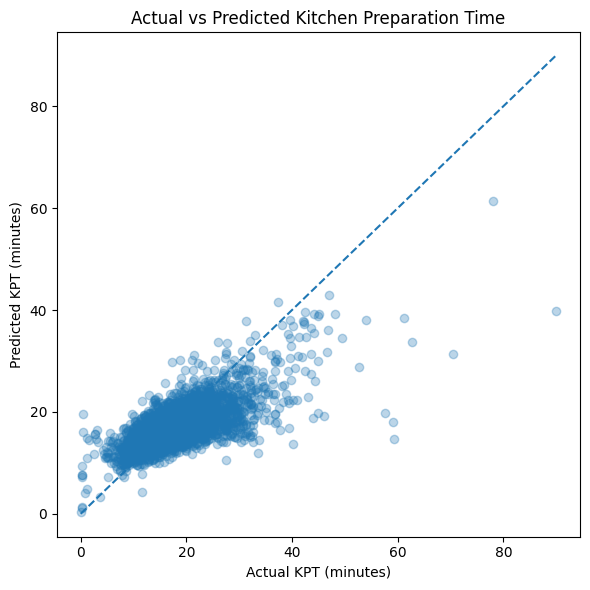

In [1826]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(inference_df["KPT_actual_min"], inference_df["KPT_pred_min"], alpha=0.3)
plt.plot([0, inference_df[["KPT_actual_min", "KPT_pred_min"]].max().max()],
         [0, inference_df[["KPT_actual_min", "KPT_pred_min"]].max().max()],
         linestyle="--")
plt.xlabel("Actual KPT (minutes)")
plt.ylabel("Predicted KPT (minutes)")
plt.title("Actual vs Predicted Kitchen Preparation Time")
plt.tight_layout()
plt.show()


Top 15 features by permutation importance:
                feature  importance_mean  importance_std
0     Packaging charges         0.454658        0.012499
3    total_discount_amt         0.099680        0.003448
39    orders_last_30min         0.091470        0.004498
26            wx_temp_c         0.077560        0.003288
10           order_hour         0.072697        0.002794
2             num_items         0.065083        0.002989
20     Subzone_Sector 4         0.051110        0.003319
28   wx_cloud_cover_pct         0.045306        0.002539
1                 Total         0.042943        0.002868
19   Subzone_Sector 135         0.035279        0.001869
11      order_dayofweek         0.027329        0.002590
25          Distance_km         0.024830        0.001703
27         wx_precip_mm         0.021960        0.002051
17  Subzone_DLF Phase 1         0.020384        0.001670
6          has_discount         0.018601        0.001396


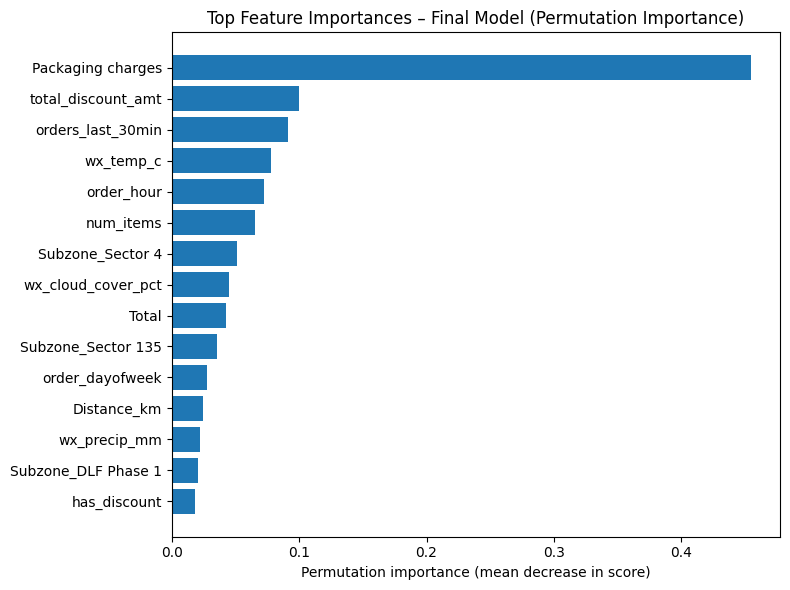

In [1827]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# 1. Compute permutation importance on the final model (pipeline)
#    We use y_test in log space because that's what the model was trained on.
result = permutation_importance(
    final_model,
    X_test[selected_features],
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importances_mean = result.importances_mean
importances_std = result.importances_std

# 2. Build DataFrame with feature names
fi_df = pd.DataFrame({
    "feature": selected_features,
    "importance_mean": importances_mean,
    "importance_std": importances_std
}).sort_values("importance_mean", ascending=False)

print("Top 15 features by permutation importance:")
print(fi_df.head(15))

# 3. Plot top 15
top_n = 15
fi_top = fi_df.head(top_n)

plt.figure(figsize=(8, 6))
plt.barh(fi_top["feature"], fi_top["importance_mean"])
plt.gca().invert_yaxis()  # highest on top
plt.xlabel("Permutation importance (mean decrease in score)")
plt.title("Top Feature Importances – Final Model (Permutation Importance)")
plt.tight_layout()
plt.show()


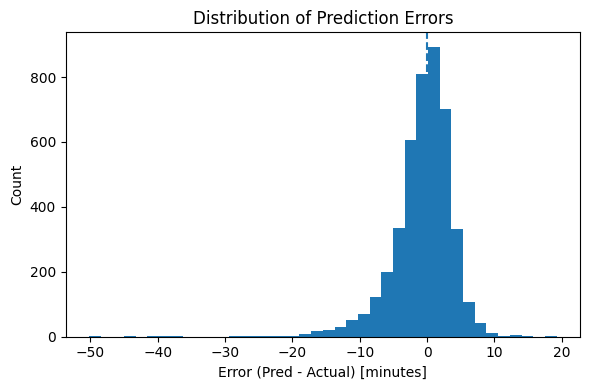

In [1828]:
plt.figure(figsize=(6, 4))
plt.hist(inference_df["error_min"], bins=40)
plt.axvline(0, linestyle="--")
plt.xlabel("Error (Pred - Actual) [minutes]")
plt.ylabel("Count")
plt.title("Distribution of Prediction Errors")
plt.tight_layout()
plt.show()


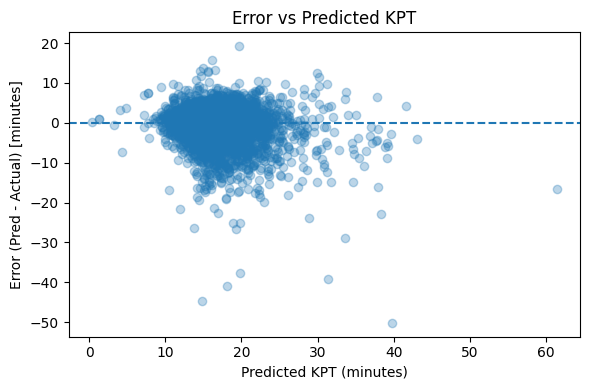

In [1829]:
plt.figure(figsize=(6, 4))
plt.scatter(inference_df["KPT_pred_min"], inference_df["error_min"], alpha=0.3)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted KPT (minutes)")
plt.ylabel("Error (Pred - Actual) [minutes]")
plt.title("Error vs Predicted KPT")
plt.tight_layout()
plt.show()


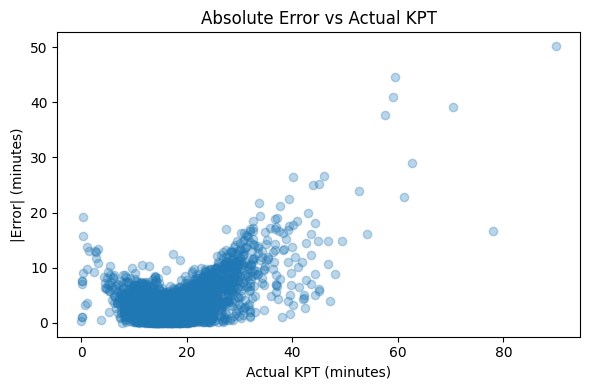

In [1830]:
plt.figure(figsize=(6, 4))
plt.scatter(inference_df["KPT_actual_min"], inference_df["abs_error_min"], alpha=0.3)
plt.xlabel("Actual KPT (minutes)")
plt.ylabel("|Error| (minutes)")
plt.title("Absolute Error vs Actual KPT")
plt.tight_layout()
plt.show()


/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_65176/2573964164.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=["Off-peak", "Peak"])


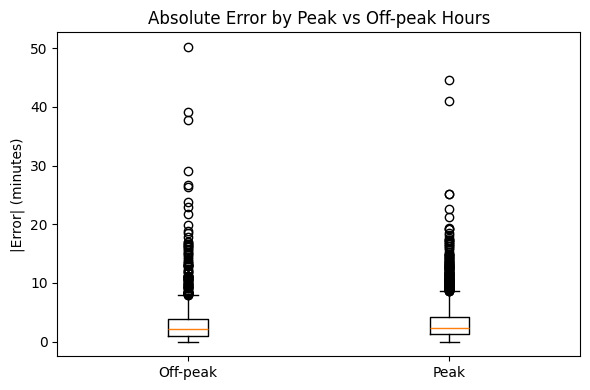

In [1831]:
# Add is_peak_hour from X_test to inference_df
inference_df = inference_df.join(X_test["is_peak_hour"])

# 0 = off-peak, 1 = peak
groups = [inference_df[inference_df["is_peak_hour"] == 0]["abs_error_min"],
          inference_df[inference_df["is_peak_hour"] == 1]["abs_error_min"]]

plt.figure(figsize=(6, 4))
plt.boxplot(groups, labels=["Off-peak", "Peak"])
plt.ylabel("|Error| (minutes)")
plt.title("Absolute Error by Peak vs Off-peak Hours")
plt.tight_layout()
plt.show()


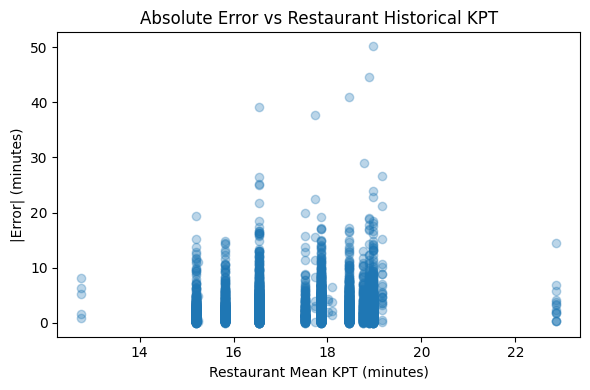

In [1832]:
# Add rest_mean_KPT from X_test to inference_df if not already present
if "rest_mean_KPT" not in inference_df.columns:
	inference_df = inference_df.join(X_test["rest_mean_KPT"])

plt.figure(figsize=(6, 4))
plt.scatter(inference_df["rest_mean_KPT"], inference_df["abs_error_min"], alpha=0.3)
plt.xlabel("Restaurant Mean KPT (minutes)")
plt.ylabel("|Error| (minutes)")
plt.title("Absolute Error vs Restaurant Historical KPT")
plt.tight_layout()
plt.show()


/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_65176/2083081659.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mae_by_items = inference_df.groupby("items_bin")["abs_error_min"].mean()


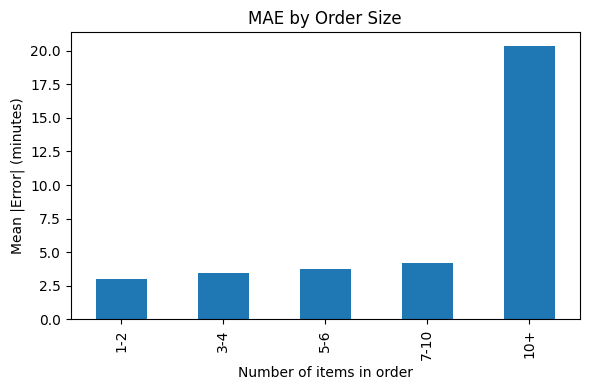

items_bin
1-2      3.046570
3-4      3.491255
5-6      3.777183
7-10     4.168639
10+     20.341334
Name: abs_error_min, dtype: float64

In [1833]:
# Bucket num_items
bins_items = [0, 2, 4, 6, 10, 100]
labels_items = ["1-2", "3-4", "5-6", "7-10", "10+"]

# Add num_items from X_test if not present
if "num_items" not in inference_df.columns:
	inference_df = inference_df.join(X_test["num_items"])

inference_df["items_bin"] = pd.cut(inference_df["num_items"], bins=bins_items, labels=labels_items, right=True)

mae_by_items = inference_df.groupby("items_bin")["abs_error_min"].mean()

plt.figure(figsize=(6, 4))
mae_by_items.plot(kind="bar")
plt.ylabel("Mean |Error| (minutes)")
plt.xlabel("Number of items in order")
plt.title("MAE by Order Size")
plt.tight_layout()
plt.show()

mae_by_items
